In [1]:
# importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Building cosine wave dataset

x = 0.1*np.arange(1000)
data = np.cos(x)

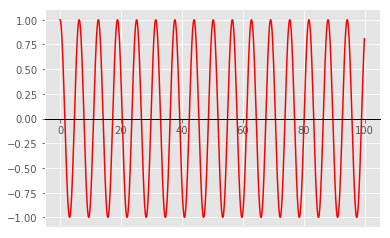

In [3]:
# Ploting cosine wave with generated dataset 

plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('center')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_xlim(0,100,auto=True)

plt.plot(x,data, 'r')

plt.show()

In [4]:
# Scaling down the raw data with StandardScaler()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1,1))

In [5]:
data_scaled = data_scaled.flatten()

In [6]:
# Splitting the scaled data into training dataset

training_dataset = data_scaled[:-150]

In [7]:
# Splitting the scaled data into test dataset, this dataset won't be used in LSTM model training

test_dataset = data_scaled[-(150+20):]

In [8]:
# Preparing the training dataset for LSTM input 

T = 20
X = []
Y = []

for t in range(len(training_dataset)-T):
  x = training_dataset[t:t+T]
  X.append(x)
  y = training_dataset[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.Shape:",X.shape, "Y.Shape:", Y.shape)

X.Shape: (830, 20, 1) Y.Shape: (830,)


In [9]:
# Preparing the test dataset for series of numbers prediction with LSTM trained model 

T = 20
X_test = []
Y_test = []

for t in range(len(test_dataset)-T):
  x = test_dataset[t:t+T]
  X_test.append(x)
  y = test_dataset[t+T]
  Y_test.append(y)
X_test = np.array(X_test).reshape(-1, T, 1)
Y_test = np.array(Y_test)
NN = len(X_test)

print("X_test.Shape:",X_test.shape, "Y_test.Shape:", Y_test.shape)

X_test.Shape: (150, 20, 1) Y_test.Shape: (150,)


In [10]:
# Splitting training dataset again into x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
print("x_train.shape:",x_train.shape, "x_test.shape:",x_test.shape, "y_train.shape:",y_train.shape, "y_test.shape:",y_test.shape)

x_train.shape: (664, 20, 1) x_test.shape: (166, 20, 1) y_train.shape: (664,) y_test.shape: (166,)


In [11]:
# Building LSTM model 

model = keras.Sequential()
model.add(keras.layers.LSTM((40), batch_input_shape=(None,20,1), activation='elu', return_sequences=True))
model.add(keras.layers.LSTM((1), activation='selu', return_sequences=False))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

W0722 16:44:51.525571  7832 deprecation.py:506] From C:\Users\22458147\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0722 16:44:51.799159  7832 deprecation.py:323] From C:\Users\22458147\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4075: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 40)            6720      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 168       
Total params: 6,888
Trainable params: 6,888
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Fitting splitted dataset into the model

r = model.fit(x_train.reshape(664,20,1), y_train, epochs=20, validation_data=(x_test.reshape(166,20,1), y_test))

Train on 664 samples, validate on 166 samples
Epoch 1/20
664/664 [==============================] - 2s 3ms/sample - loss: 0.8917 - acc: 0.0000e+00 - val_loss: 0.7663 - val_acc: 0.0000e+00
Epoch 2/20
664/664 [==============================] - 0s 706us/sample - loss: 0.6626 - acc: 0.0000e+00 - val_loss: 0.5793 - val_acc: 0.0000e+00
Epoch 3/20
664/664 [==============================] - 1s 834us/sample - loss: 0.4527 - acc: 0.0000e+00 - val_loss: 0.2820 - val_acc: 0.0000e+00
Epoch 4/20
664/664 [==============================] - 1s 1ms/sample - loss: 0.1864 - acc: 0.0000e+00 - val_loss: 0.1053 - val_acc: 0.0000e+00
Epoch 5/20
664/664 [==============================] - 1s 1ms/sample - loss: 0.0590 - acc: 0.0000e+00 - val_loss: 0.0235 - val_acc: 0.0000e+00
Epoch 6/20
664/664 [==============================] - 1s 1ms/sample - loss: 0.0311 - acc: 0.0000e+00 - val_loss: 0.0226 - val_acc: 0.0000e+00
Epoch 7/20
664/664 [==============================] - 1s 2ms/sample - loss: 0.0231 - acc: 0.0000e+

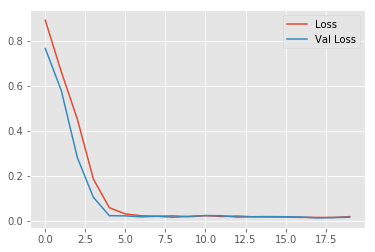

In [14]:
plt.style.use('ggplot')
plt.plot(r.history['loss'], label="Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()
plt.rcParams['figure.figsize'] = 6,4

In [15]:
# Predicting y_test when x_test is feeded into the model

result = model.predict(x_test.reshape(166,20,1))

In [16]:
# reversing predicted y_test values 

scaler.inverse_transform(result).flatten()

array([ 0.7636642 ,  0.8275174 ,  0.88067466,  0.92352057,  0.9570026 ,
        0.98185015,  0.99871206,  1.00775   ,  1.0086284 ,  1.0005062 ,
        0.98206717,  0.9519964 ,  0.9096371 ,  0.85529387,  0.7902267 ,
        0.71641445,  0.6362715 ,  0.55231386,  0.4668479 ,  0.38181645,
        0.29845434,  0.21713112,  0.13002084,  0.03206648, -0.10202967,
       -0.22712217, -0.32894105, -0.41873273, -0.5002491 , -0.5767192 ,
       -0.64836466, -0.7154591 , -0.7780899 , -0.83479774, -0.88519794,
       -0.92773   , -0.9612991 , -0.9847969 , -0.99714553, -0.9977755 ,
       -0.98689675, -0.964947  , -0.9328279 , -0.8916952 , -0.8428064 ,
       -0.7872644 , -0.726142  , -0.6602034 , -0.58928144, -0.51189375,
       -0.42703062, -0.3374678 , -0.24089338, -0.13168539, -0.00160885,
        0.08374443,  0.17109977,  0.2599934 ,  0.35090092,  0.44308165,
        0.5342845 ,  0.62179124,  0.70299417,  0.77517354,  0.83716685,
        0.88860404,  0.9297979 ,  0.96176994,  0.98524165,  1.00

In [17]:
# look into original y_test values

scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

array([ 0.75506808,  0.8167513 ,  0.87027382,  0.91510085,  0.95078449,
        0.97696821,  0.99339038,  0.99988693,  0.99639293,  0.98294331,
        0.95967244,  0.92681285,  0.88469284,  0.83373328,  0.77444333,
        0.7074154 ,  0.6333192 ,  0.55289509,  0.46694664,  0.37633261,
        0.28195839,  0.18476693,  0.08572935, -0.01416482, -0.11391746,
       -0.21253187, -0.30902273, -0.40242594, -0.49180824, -0.57627656,
       -0.65498691, -0.72715285, -0.79205332, -0.84903985, -0.89754306,
       -0.93707831, -0.96725059, -0.98775842, -0.99839689, -0.99905971,
       -0.98974026, -0.97053165, -0.94162581, -0.90331156, -0.85597171,
       -0.80007928, -0.73619272, -0.66495036, -0.58706405, -0.50331198,
       -0.41453098, -0.32160813, -0.22547188, -0.12708278, -0.02742392,
        0.07250895,  0.17171734,  0.26920999,  0.36401278,  0.45517847,
        0.54179617,  0.62300042,  0.69797986,  0.76598531,  0.82633729,
        0.87843279,  0.92175127,  0.95585992,  0.98041793,  0.99

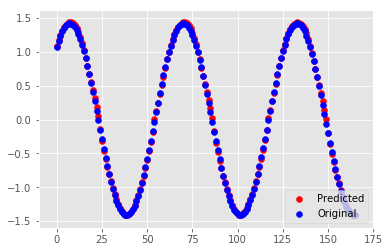

In [18]:
# Plotting y_test and predicted y_test 

plt.style.use('ggplot')
plt.scatter(range(166), result, c='r', label="Predicted")
plt.scatter(range(166),y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

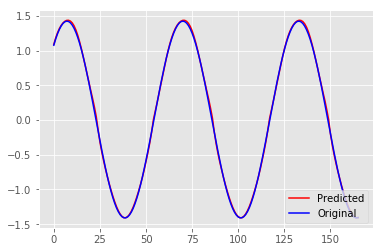

In [19]:
# Plotting y_test and predicted y_test 

plt.style.use('ggplot')
plt.plot(result, c='r', label="Predicted")
plt.plot(y_test, c='b', label="Original")
plt.legend(loc ="lower right") 
plt.show()

In [20]:
# Testing the model with untrain dataset X_test 

result_01 = model.predict(X_test).flatten()

In [21]:
result_01

array([-1.3827531 , -1.3466321 , -1.2966114 , -1.2344477 , -1.1618232 ,
       -1.0802854 , -0.991295  , -0.8955773 , -0.7923833 , -0.67839843,
       -0.5568081 , -0.4274539 , -0.28400108, -0.12080464,  0.04519667,
        0.16729255,  0.29149762,  0.41859564,  0.5482162 ,  0.6786825 ,
        0.806716  ,  0.92817956,  1.0392516 ,  1.136985  ,  1.2195526 ,
        1.2875099 ,  1.3414097 ,  1.3825374 ,  1.4119741 ,  1.430272  ,
        1.437339  ,  1.4323474 ,  1.4137198 ,  1.3794644 ,  1.3280989 ,
        1.2593589 ,  1.1743827 ,  1.0755225 ,  0.96594304,  0.84921247,
        0.7287641 ,  0.60766876,  0.48821697,  0.37154153,  0.25762215,
        0.12324661, -0.02935892, -0.23616202, -0.39069444, -0.5244429 ,
       -0.64568263, -0.75761527, -0.8619984 , -0.9607335 , -1.0524627 ,
       -1.1371564 , -1.2133336 , -1.279175  , -1.3334061 , -1.3739374 ,
       -1.3993663 , -1.4085404 , -1.4011698 , -1.3777211 , -1.3391471 ,
       -1.2869582 , -1.2229211 , -1.1486908 , -1.0658088 , -0.97

In [22]:
# look into original Y_test values

scaler.inverse_transform(Y_test.reshape(-1,1)).flatten()

array([-0.98437664, -0.96188063, -0.92977382, -0.88837702, -0.83810385,
       -0.77945663, -0.71302133, -0.63946176, -0.55951289, -0.47397356,
       -0.38369844, -0.28958954, -0.19258715, -0.09366049,  0.00620199,
        0.1060025 ,  0.20474387,  0.30143951,  0.39512326,  0.48485907,
        0.56975033,  0.64894884,  0.72166326,  0.78716706,  0.84480575,
        0.89400342,  0.9342685 ,  0.96519868,  0.98648491,  0.99791451,
        0.99937328,  0.99084665,  0.9724198 ,  0.94427685,  0.906699  ,
        0.86006172,  0.80483098,  0.74155864,  0.67087688,  0.59349195,
        0.51017704,  0.42176462,  0.32913806,  0.23322286,  0.13497737,
        0.03538324, -0.06456443, -0.163867  , -0.26153226, -0.35658437,
       -0.44807362, -0.53508586, -0.61675169, -0.69225515, -0.76084183,
       -0.82182642, -0.8745996 , -0.91863407, -0.95348985, -0.97881867,
       -0.99436746, -0.99998086, -0.99560278, -0.98127697, -0.95714656,
       -0.92345266, -0.88053193, -0.82881321, -0.76881327, -0.70

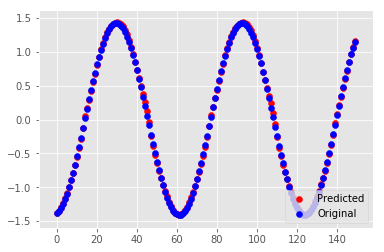

In [23]:
# Plotting Y_test and predicted Y_test 

plt.style.use('ggplot')
plt.scatter(range(150), result_01, c='r', label="Predicted")
plt.scatter(range(150),Y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

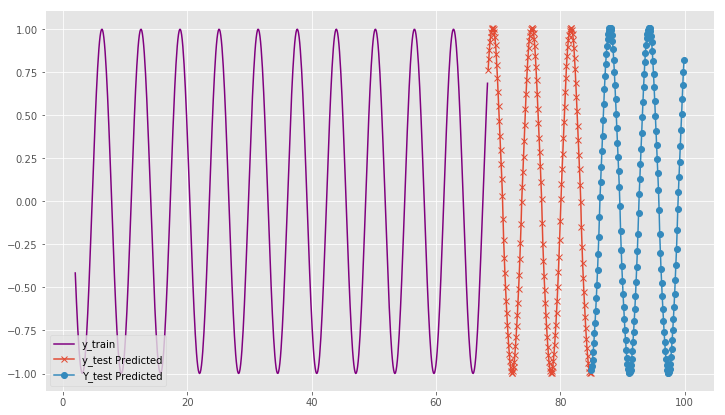

In [25]:
# Plotting y_train, predicted y_test and predicted Y_test (with original values)

x = 0.1*np.arange(1000)

fig, ax1 = plt.subplots()
ax1.plot(x[20:-150][:664], scaler.inverse_transform(y_train.reshape(-1,1)).flatten(), c='purple', label='y_train')
# ax1.plot(x[20:-150][664:], scaler.inverse_transform(y_test.reshape(-1,1)).flatten(), 'c-', label='y_test')
# ax1.plot(x[850:], scaler.inverse_transform(Y_test.reshape(-1,1)).flatten(), 'b-', label='Y_test')
ax1.plot(x[20:-150][664:], scaler.inverse_transform(result.reshape(-1,1)).flatten(), 'x-', label='y_test Predicted')
ax1.plot(x[850:], scaler.inverse_transform(result_01.reshape(-1,1)).flatten(), 'o-', label='Y_test Predicted')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7

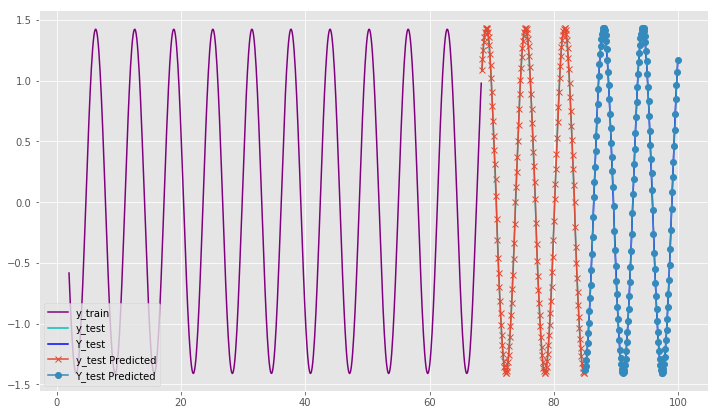

In [26]:
# Plotting y_train, y_test, Y_test, predicted y_test and predicted Y_test (with scaled values)

fig, ax1 = plt.subplots()

ax1.plot(x[20:-150][:664], y_train, c='purple', label='y_train')
ax1.plot(x[20:-150][664:], y_test, 'c-', label='y_test')
ax1.plot(x[850:], Y_test, 'b-', label='Y_test')
ax1.plot(x[20:-150][664:], result, 'x-', label='y_test Predicted')
ax1.plot(x[850:], result_01, 'o-', label='Y_test Predicted')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7